In [138]:
# the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, accuracy_score, roc_auc_score, roc_curve, f1_score, classification_report
from sklearn.metrics import confusion_matrix, SCORERS

# preprocessing
from sklearn.preprocessing import StandardScaler

In [139]:
X = pd.read_csv('./data/processed_second_X.csv')
y = pd.read_csv('./data/processed_second_y.csv')

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=18)

In [8]:
y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()

## Logistic Regression

In [9]:
sts = StandardScaler()
sts.fit(X_train)

StandardScaler()

In [10]:
X_train_scale = sts.transform(X_train)
X_val_scale = sts.transform(X_val)

In [82]:
parameters = {'class_weight':[{1:1,0:1},
                              {1:2,0:1},
                              {1:3,0:1},
                              {1:4,0:1},
                              {1:5,0:1}],
              'C':[.001, .01, 1, 10]}
scores = ['f1','recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
            LogisticRegression(),
            parameters, scoring='%s' % score)
    clf.fit(X_train_scale, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']

    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_val, clf.predict(X_val_scale)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for f1

Best parameters set found on development set:
{'C': 1, 'class_weight': {1: 4, 0: 1}}

Grid scores on development set:

0.336 (+/-0.007) for {'C': 0.001, 'class_weight': {1: 1, 0: 1}}
0.505 (+/-0.008) for {'C': 0.001, 'class_weight': {1: 2, 0: 1}}
0.553 (+/-0.008) for {'C': 0.001, 'class_weight': {1: 3, 0: 1}}
0.555 (+/-0.005) for {'C': 0.001, 'class_weight': {1: 4, 0: 1}}
0.544 (+/-0.004) for {'C': 0.001, 'class_weight': {1: 5, 0: 1}}
0.360 (+/-0.008) for {'C': 0.01, 'class_weight': {1: 1, 0: 1}}
0.513 (+/-0.011) for {'C': 0.01, 'class_weight': {1: 2, 0: 1}}
0.556 (+/-0.007) for {'C': 0.01, 'class_weight': {1: 3, 0: 1}}
0.557 (+/-0.005) for {'C': 0.01, 'class_weight': {1: 4, 0: 1}}
0.546 (+/-0.004) for {'C': 0.01, 'class_weight': {1: 5, 0: 1}}
0.364 (+/-0.006) for {'C': 1, 'class_weight': {1: 1, 0: 1}}
0.514 (+/-0.010) for {'C': 1, 'class_weight': {1: 2, 0: 1}}
0.555 (+/-0.008) for {'C': 1, 'class_weight': {1: 3, 0: 1}}
0.557 (+/-0.006) for {'C': 1, 'c

In [68]:
sorted(mSCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [47]:
# with L1 regularization
lm_l1 = LogisticRegression(C=.001, 
                        solver='liblinear',
                        penalty='l1').fit(X_train_scale, y_train)

# with L2 regularization
lm_l2 = LogisticRegression(C=.001).fit(X_train_scale, y_train)

In [46]:
# with L1 regularization / weight
lm_l1_weight = LogisticRegression(C=1, 
                        solver='liblinear',
                        penalty='l1',
                        class_weight={1:4,0:1}).fit(X_train_scale, y_train)

# with L2 regularization / weight
lm_l2_weight = LogisticRegression(C=1,
                        class_weight={1:4,0:1}).fit(X_train_scale, y_train)

In [94]:
# with L1 regularization / weight / grid search -- recall optimized
lm_l1_weight_g = LogisticRegression(C=.001, 
                        solver='liblinear',
                        penalty='l1',
                        class_weight={1:5,0:1}).fit(X_train_scale, y_train)

# with L2 regularization / weight / grid search
lm_l2_weight_g = LogisticRegression(C=.001,
                        class_weight={1:5,0:1}).fit(X_train_scale, y_train)

In [95]:
yhat_l1_val = lm_l1.predict(X_val_scale)
yhat_l2_val = lm_l2.predict(X_val_scale)
yhat_l1_val_w = lm_l1_weight.predict(X_val_scale)
yhat_l2_val_w = lm_l2_weight.predict(X_val_scale)
yhat_l1_val_w_g = lm_l1_weight_g.predict(X_val_scale)
yhat_l2_val_w_g = lm_l2_weight_g.predict(X_val_scale)

In [145]:
feat = X_train.columns
list(zip(feat,lm_l1_weight_g.coef_[0,:]))

[('ethnicity_African American', 0.0),
 ('icu_type_Neuro ICU', -0.010430246508216133),
 ('ethnicity_Caucasian', -0.09474252591617302),
 ('d1_sysbp_max', 0.0737083232296042),
 ('d1_diasbp_min', 0.0),
 ('d1_sysbp_noninvasive_max', 0.004481252767759951),
 ('d1_diasbp_noninvasive_min', 0.0),
 ('weight', 0.219725248927442),
 ('bmi', 0.18079190830863134),
 ('age', 0.26575098970512956),
 ('h1_sysbp_max', 0.03325048546266536),
 ('h1_diasbp_min', -0.03733627342784228),
 ('h1_diasbp_max', -0.0849008705773101),
 ('d1_glucose_min', -0.081682010768687),
 ('d1_glucose_max', 1.0849472456101796),
 ('h1_sysbp_noninvasive_max', 0.02212899751874794),
 ('h1_diasbp_noninvasive_min', 0.0),
 ('h1_diasbp_noninvasive_max', 0.0),
 ('d1_potassium_min', 0.0),
 ('d1_potassium_max', 0.0),
 ('d1_creatinine_min', 0.03207051245853899),
 ('d1_creatinine_max', 0.0),
 ('d1_sodium_min', 0.0),
 ('d1_bun_min', 0.057622064822848984),
 ('d1_bun_max', 0.0),
 ('glucose_apache', 0.0),
 ('d1_hematocrit_max', 0.0),
 ('d1_hematocrit

In [50]:
len(list(zip(feat,lm_l2.coef_[0,:])))

39

In [96]:
print("NO WEIGHT")
print("L2 Regularization:")
print("Precision: {:6.4f},   Recall: {:6.4f},\nF1: {:6.4f}\n".format(precision_score(y_val, yhat_l2_val), 
                                                     recall_score(y_val, yhat_l2_val),
                                                     f1_score(y_val,yhat_l2_val)))

print("L1 Regularization:")
print("Precision: {:6.4f},   Recall: {:6.4f},\nF1: {:6.4f}\n".format(precision_score(y_val, yhat_l1_val), 
                                                     recall_score(y_val, yhat_l1_val),
                                                     f1_score(y_val,yhat_l1_val)))

print("WEIGHT")
print("L2 Regularization:")
print("Precision: {:6.4f},   Recall: {:6.4f},\nF1: {:6.4f}\n".format(precision_score(y_val, yhat_l2_val_w), 
                                                     recall_score(y_val, yhat_l2_val_w),
                                                     f1_score(y_val,yhat_l2_val_w)))

print("L1 Regularization:")
print("Precision: {:6.4f},   Recall: {:6.4f},\nF1: {:6.4f}\n".format(precision_score(y_val, yhat_l1_val_w), 
                                                     recall_score(y_val, yhat_l1_val_w),
                                                     f1_score(y_val,yhat_l1_val_w)))
print("GRID SEARCH")
print("L2 Regularization:")
print("Precision: {:6.4f},   Recall: {:6.4f},\nF1: {:6.4f}\n".format(precision_score(y_val, yhat_l2_val_w_g), 
                                                     recall_score(y_val, yhat_l2_val_w_g),
                                                     f1_score(y_val,yhat_l2_val_w_g)))

print("L1 Regularization:")
print("Precision: {:6.4f},   Recall: {:6.4f},\nF1: {:6.4f}\n".format(precision_score(y_val, yhat_l1_val_w), 
                                                     recall_score(y_val, yhat_l1_val_w_g),
                                                     f1_score(y_val,yhat_l1_val_w_g)))


NO WEIGHT
L2 Regularization:
Precision: 0.6001,   Recall: 0.2625,
F1: 0.3652

L1 Regularization:
Precision: 0.5982,   Recall: 0.2571,
F1: 0.3597

WEIGHT
L2 Regularization:
Precision: 0.4481,   Recall: 0.7337,
F1: 0.5564

L1 Regularization:
Precision: 0.4468,   Recall: 0.7333,
F1: 0.5553

GRID SEARCH
L2 Regularization:
Precision: 0.4110,   Recall: 0.8030,
F1: 0.5438

L1 Regularization:
Precision: 0.4468,   Recall: 0.7972,
F1: 0.5481



In [109]:
def make_confusion_matrix(model, threshold=0.5):
    y_hat = (model.predict_proba(X_val_scale)[:, 1] >= threshold)
    diabetes_confusion = confusion_matrix(y_val, y_hat)
    
    plt.figure(dpi=150)
    sns.heatmap(diabetes_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['pred no', 'pred yes'],
           yticklabels=['actual no', 'actual yes']);
    plt.title('Confusion Matrix -- Weighted L2')
    plt.savefig('./project-checkpoints/lm_l1_weight_g_confusion.png')

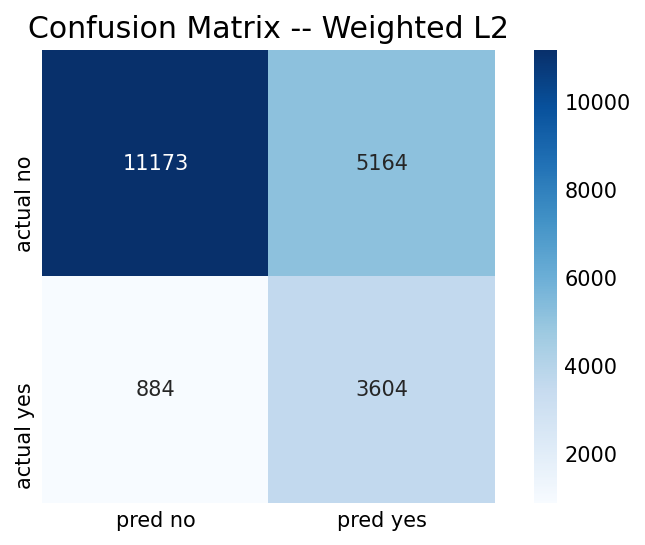

In [110]:
make_confusion_matrix(lm_l2_weight_g)

In [117]:
fpr, tpr, thresholds = roc_curve(y_val, lm_l2_weight_g.predict_proba(X_val_scale)[:,1])

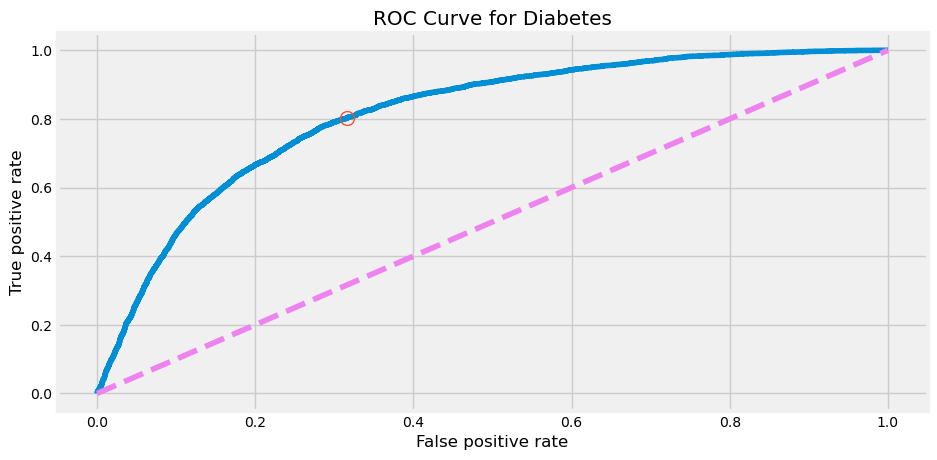

In [125]:
plt.figure(figsize=(10,5),dpi=100)
close_zero = np.argmin(np.abs(thresholds - .5))
plt.plot(fpr,tpr,label="ROC Curve")
plt.plot(fpr[close_zero], tpr[close_zero],'o',markersize=10, label='threshold zero',fillstyle='none')
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for Diabetes');

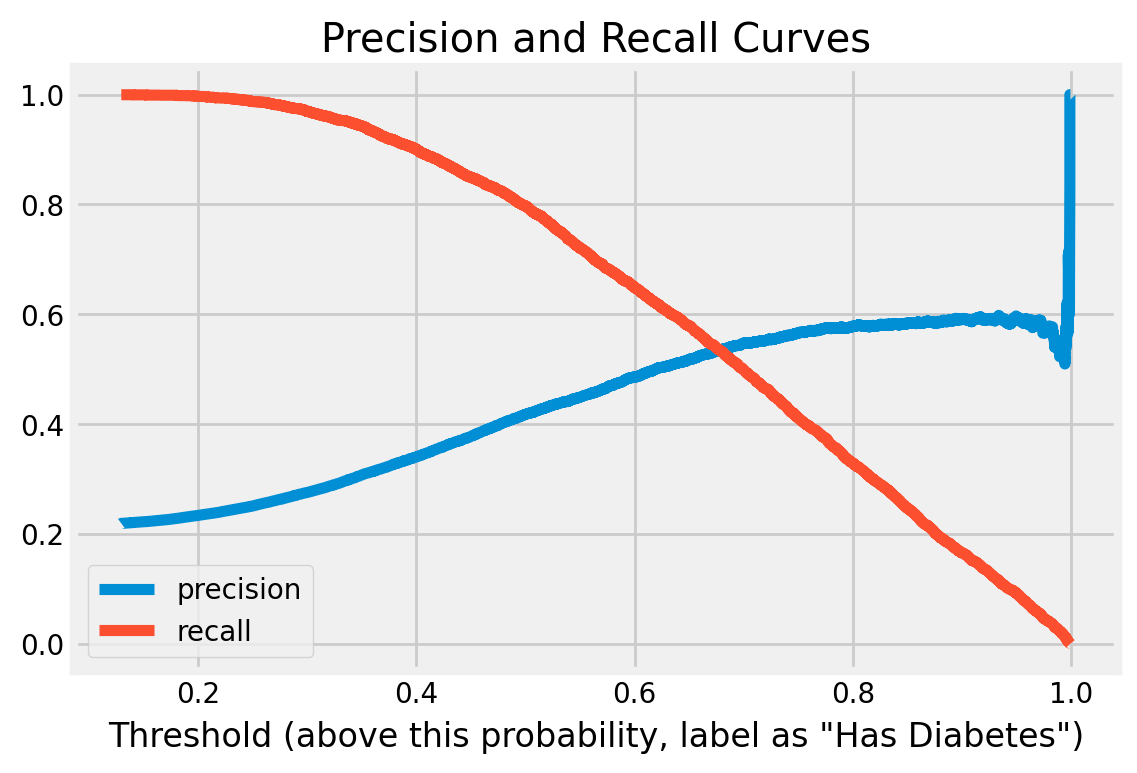

In [143]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lm_l1_weight_g.predict_proba(X_val_scale)[:,1] )

plt.figure(dpi=200)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as "Has Diabetes")');
plt.title('Precision and Recall Curves');